In [86]:
#importing the library
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta,date
import plotly.graph_objects as go # this help to change in graph plotted by the plotly
import plotly.express as px # to prepare different type of plot

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX






In [61]:
# Replace 'your_file.csv' with the name of the uploaded file
df = pd.read_csv('TATAMOTORS.csv')
print(df.head())


         Date        Open        High         Low       Close   Adj Close    Volume
0  2023-07-31  640.200012  645.549988  635.900024  644.299988  642.317871   7502361
1  2023-08-01  645.000000  652.900024  642.000000  643.650024  641.669861   8924219
2  2023-08-02  644.000000  644.299988  616.450012  622.650024  620.734497  15762687
3  2023-08-03  623.000000  626.450012  614.150024  618.950012  617.045837  11458920
4  2023-08-04  624.849976  625.000000  613.299988  615.000000  613.107971  11806739


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [63]:
# Convert the 'date_column' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
#define  the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date=d1
d2= date.today()- timedelta(days=365)
d2=d2.strftime("%Y-%m-%d")
start_date=d2
print("Your data will be between these dates:",start_date,end_date)



Your data will be between these dates: 2023-08-01 2024-07-31


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       245 non-null    datetime64[ns]
 1   Open       245 non-null    float64       
 2   High       245 non-null    float64       
 3   Low        245 non-null    float64       
 4   Close      245 non-null    float64       
 5   Adj Close  245 non-null    float64       
 6   Volume     245 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.5 KB


In [66]:
#plot the data to see how it looks for the like using the plopy
fig = px.line(df,x='Date', y = df.columns,title = "Tata motors stock price")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [67]:
#Select the column
df = df[["Date","Close"]]
df.head()


,Date,Close
0,2023-07-31,644.299988
1,2023-08-01,643.650024
2,2023-08-02,622.650024
3,2023-08-03,618.950012
4,2023-08-04,615.000000


In [68]:
#plot the data to see how it looks for the like using the plopy
fig = px.line(df,x='Date', y = 'Close',title = "Tata motors stock price")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [69]:
df.describe()

,Date,Close
count,245,245.000000
mean,2024-01-29 03:31:35.510204160,828.424287
min,2023-07-31 00:00:00,601.000000
25%,2023-10-30 00:00:00,647.349976
50%,2024-01-30 00:00:00,858.849976
75%,2024-05-02 00:00:00,978.250000
max,2024-07-31 00:00:00,1161.849976
std,NaN,162.803258


In [72]:
#stationarity check on data using the adfuller test
def check_staionarity(df):
  result = adfuller(df)
  print('ADF statistic: %f' % result[0])
  print('p-value: %f' %result[1])
  if result[1]<= 0.05:
    print("Reject the null hypothesis.Data is stationary")
  else:
    print("Fail to reject the null hypothsis. Data is not stationary")


check_staionarity(df['Close'])


ADF statistic: 0.290337
p-value: 0.976897
Fail to reject the null hypothsis. Data is not stationary


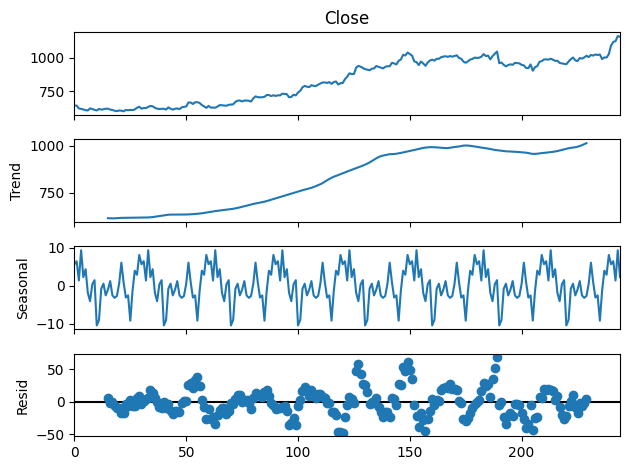

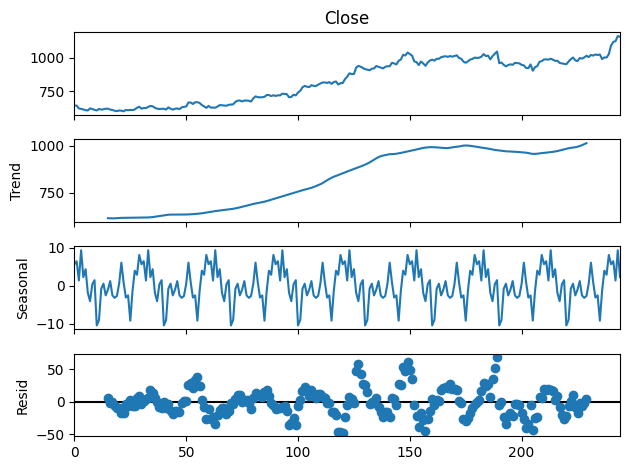

In [75]:
#Deacompse the data to see the trend, seasionality and noise
decompose = seasonal_decompose(df['Close'],model= "additive",period =30)
decompose.plot()

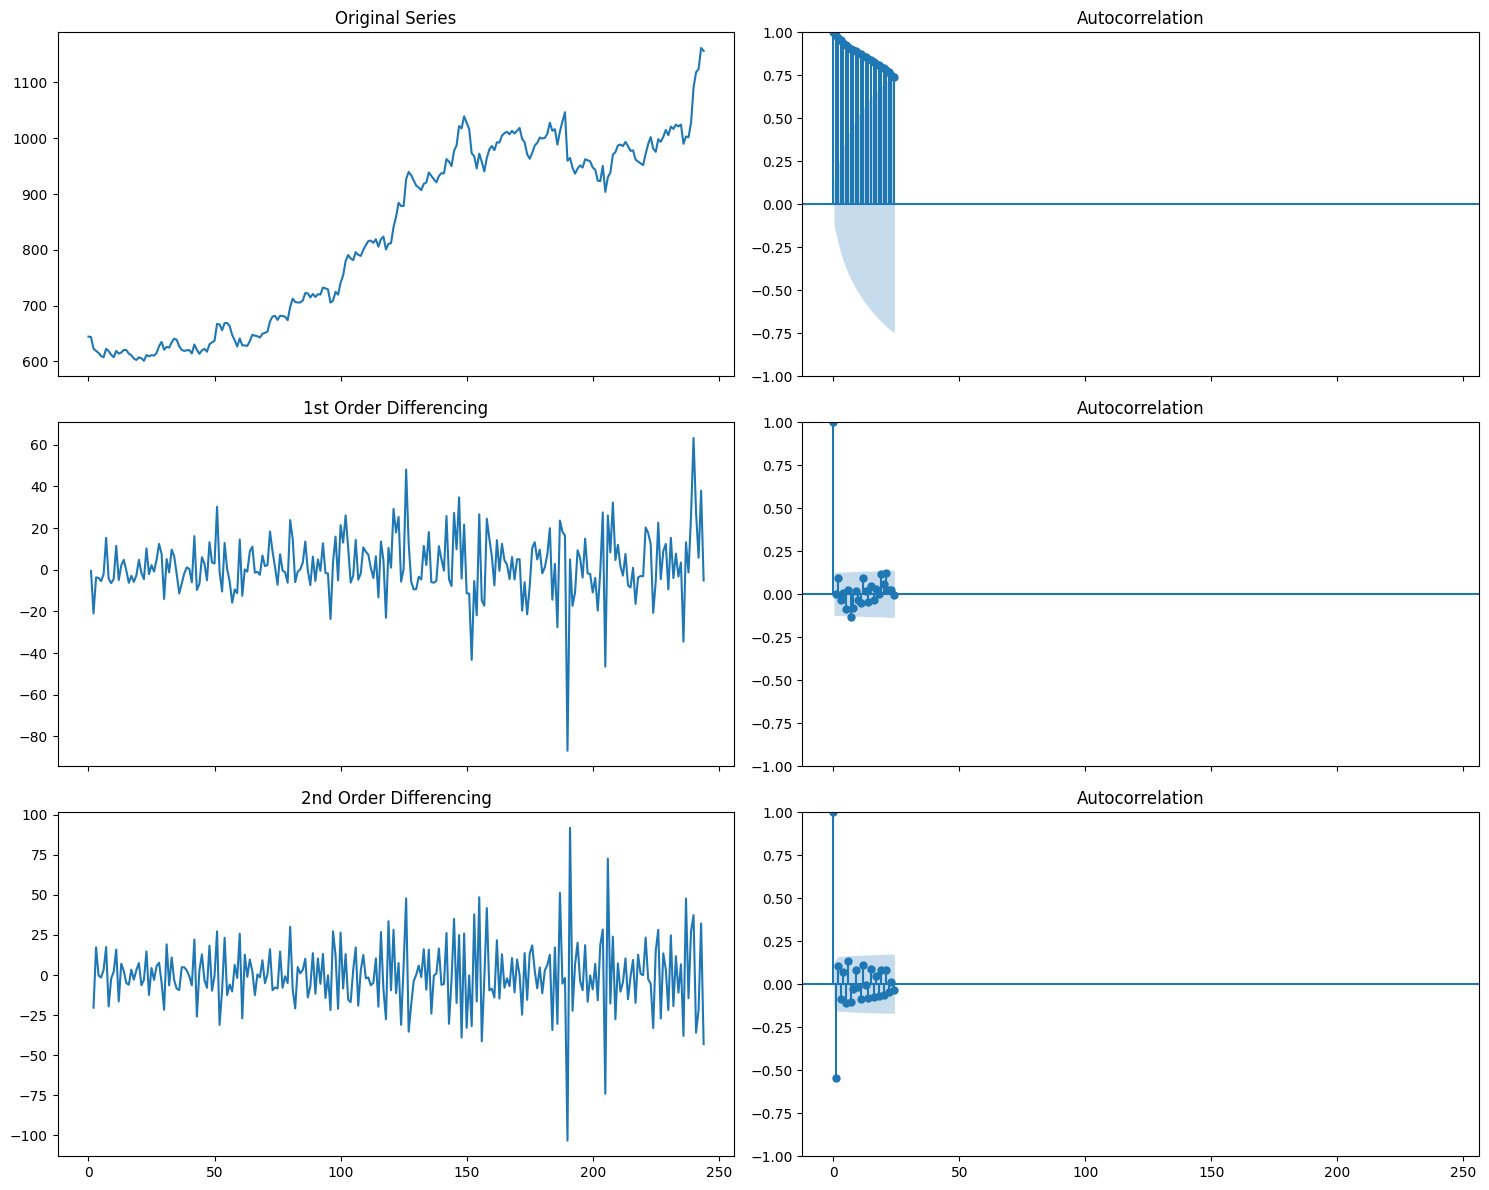

In [93]:

fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)

# Original series
axes[0, 0].plot(df['Close'])
axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st differencing
first_diff = df['Close'].diff().dropna()
axes[1, 0].plot(first_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])
#plot_pacf(first_diff, ax=axes[1, 1])

# 2nd differencing
second_diff = first_diff.diff().dropna()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()

## d = 1

## lets find p value

           0
0   1.000000
1   0.984903
2   0.969337
3   0.954176
4   0.939310
5   0.925480
6   0.915280
7   0.905985
8   0.897983
9   0.891055
10  0.881879
11  0.872877
12  0.864323
13  0.855098
14  0.845438
15  0.836910
16  0.827358
17  0.818381
18  0.809372
19  0.799794
20  0.790185
21  0.779791
22  0.767145
23  0.754630


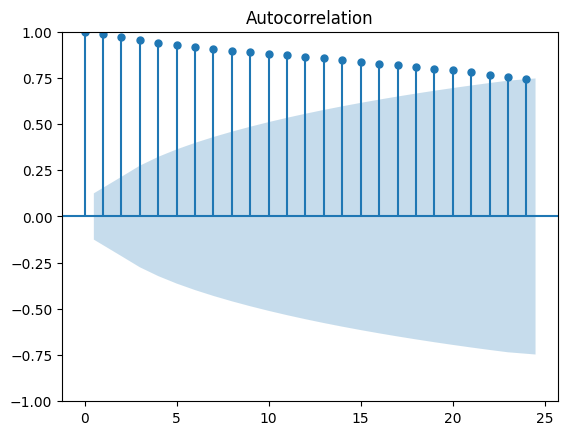

In [106]:
# plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['Close'],alpha = 0.05)

from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

# p = 4

# Let find q value

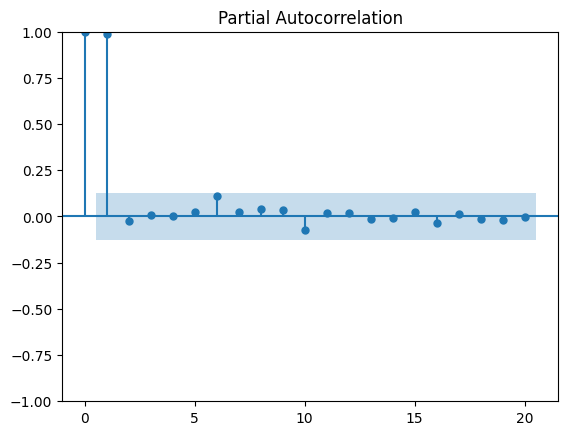

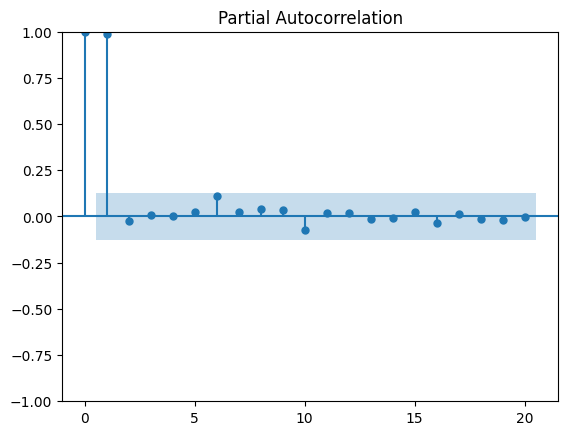

In [105]:
#partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'],lags =20,alpha =0.05)


q = 2

In [ ]:
#lets define p,q,d
p = 4
d = 1
q = 2

In [107]:
#stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 4,1,2
model  = ARIMA(df["Close"],order = (p,q,d))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  245
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -999.499
Date:                Wed, 31 Jul 2024   AIC                           2010.998
Time:                        16:22:50   BIC                           2031.956
Sample:                             0   HQIC                          2019.440
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0092      0.064      0.144      0.885      -0.115       0.134
ar.L2          0.0993      0.066      1.504      0.133      -0.030       0.229
ar.L3         -0.0312      0.054     -0.580      0.5

245    1162.311902
246    1162.633315
247    1165.566648
248    1167.333759
249    1169.597130
250    1171.627948
251    1173.761767
252    1175.849260
253    1177.957512
254    1180.056406
255    1182.159490
Name: predicted_mean, dtype: float64


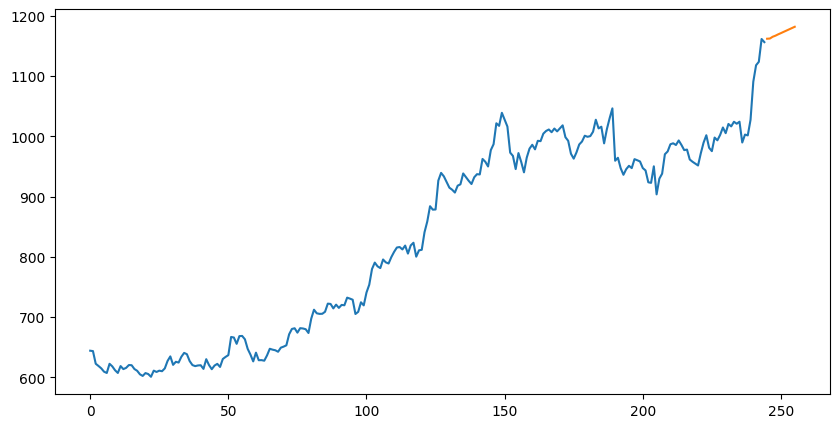

In [113]:
#predict next 10 days
forecast = model.predict(len(df["Close"]),len(df["Close"])+10)
print(forecast)

#plot forcast
plt.figure(figsize=(10,5))
plt.plot(df["Close"],label ="Actual")
plt.plot(forecast,label ="Forecast")

#here Arima model dosen't works well, because we think that it has component of the seasons

In [117]:
#let's run SARIMA
import statsmodels.api as sm
import warnings

p,d,q = 4,1,2
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order= (p,d,q,12))
model =model.fit()
print(model.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  245
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -964.711
Date:                            Wed, 31 Jul 2024   AIC                           1955.423
Time:                                    16:40:00   BIC                           2000.230
Sample:                                         0   HQIC                          1973.493
                                            - 245                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1338      2.484     -0.457      0.648      -6.001       3.734
ar.L2         -0.3174      1.597   

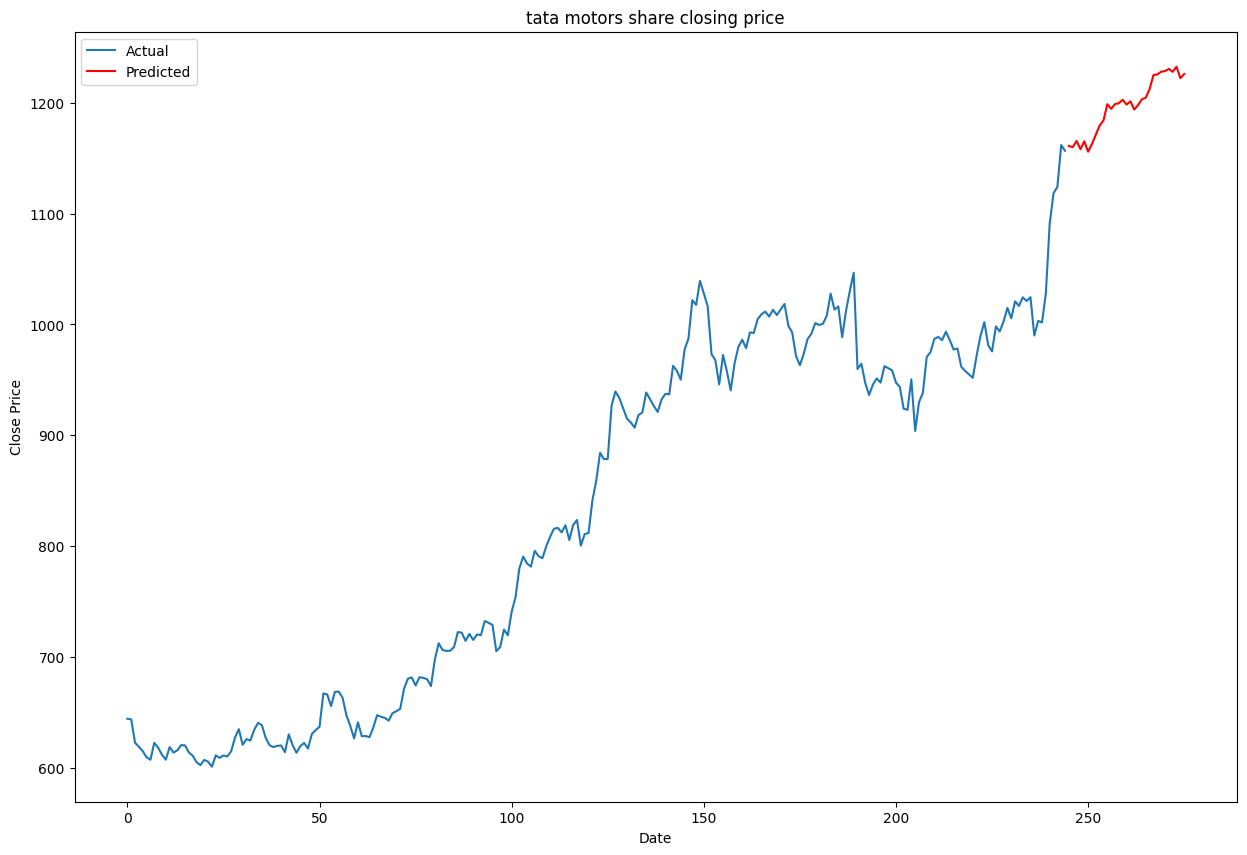

In [121]:
predictions = model.predict(start = len(df['Close']),end = len(df["Close"])+30)
#plot the prediction
plt.figure(figsize = (15,10))
plt.plot(df["Close"],label = "Actual")
plt.plot(predictions,color = "red",label = "Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title('tata motors share closing price')
#Change the lengend location
plt.legend(loc ="upper left")
plt.show()


#Now we will do somwthing new to calculate the MAPE(Mean Absolute Percentage Error)


In [122]:
# Split the data into training and testing sets
train_data = df['Close'][:200]
test_data = df['Close'][200:]

In [123]:
# Fit the SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data, order=(4, 1, 2), seasonal_order=(4, 1, 2, 12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [124]:
# Forecast the values
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

MAPE: 2.86%


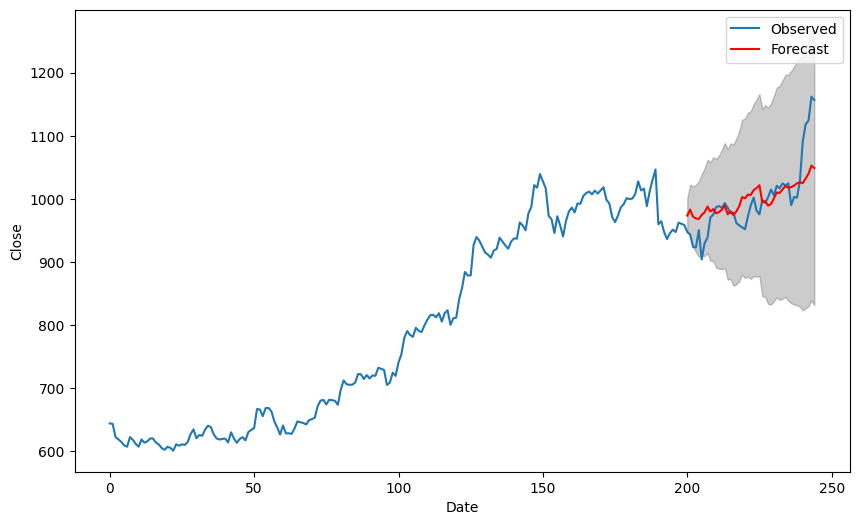

In [126]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_data, forecast_mean)

print(f'MAPE: {mape:.2%}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, forecast_mean - 1.96 * forecast.se_mean, forecast_mean + 1.96 * forecast.se_mean, color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()